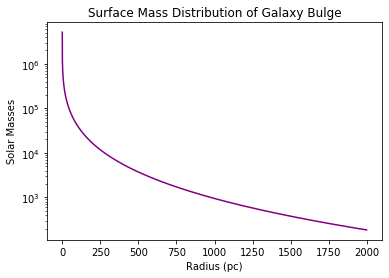

In [598]:
'''Searching for Life
   Mahee Hossain (1080102) and Archie Embleton-Mew (1079647)
'''

%matplotlib inline
import math as mt
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from scipy import integrate


''' Coding in the surface mass density of the Milky Way Bulge '''

# Constants for the Milky Way

re = 0.75e3            # Radius where mass density of bulge drops to half
Ms = 1                 # Solar Mass
bO = (5.12e6)*Ms       # Central Surface Mass Density of Bulge    HAVEN'T INCLUDED UNCERTAINTY
ro = 2000              # Radius of the bulge in pc
b_steps = 1            # Steps per pc
tb_steps = ro*b_steps
b = 8
n = 4
# Initially we used ro for this, but ro didn't match up with disc. Instead we used re/(b**n), with b being solved
# by the tutor to be roughly 8, and with n found through guess and check (we assumed n was an integer and just 
# tried different values until the curves roughly fit)


def bulge_mass_density(r):   
    return( bO* mt.exp( -((r/(re/(b**n)))**(1/4)) ) )#*2*mt.pi*r)

b_masslst=np.zeros(tb_steps)
b_radiuslst=np.zeros(tb_steps)
for i in range(0, (tb_steps)):
    b_masslst[i] = bulge_mass_density(i/b_steps)
    b_radiuslst[i] = i/b_steps


''' Plotting the Mass distribution of the Milky Way Bulge '''
plt.plot(b_radiuslst, b_masslst, 'purple')
plt.title('Surface Mass Distribution of Galaxy Bulge')
plt.xlabel('Radius (pc)')
plt.ylabel('Solar Masses')
plt.yscale('log')
plt.show()

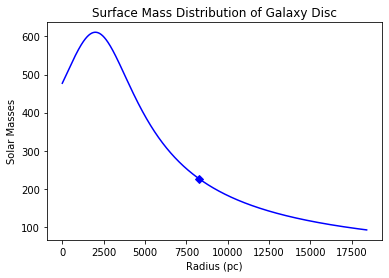

In [582]:
''' Coding in the surface mass density of the Milky Way Disc '''

# Constants for the Milky Way

lc = 2.5e3             # Length of the Stellar Disc
Ms = 1                 # Solar Mass
sO = (611)*Ms          # Central Surface Mass Density of Disc   HAVEN'T INCLUDED UNCERTAINTY
g_r = 18396            # Radius of the galaxy
d_steps = 1            # Steps per pc
td_steps = g_r*d_steps

solar_system_location = [8278]

def disc_mass_density(r):   
    return( (sO*lc)/(( ((r-ro)**2) + (lc**2) )**(1/2)) )#* 2*mt.pi*r)

d_masslst=np.zeros(td_steps)
d_radiuslst=np.zeros(td_steps)
for i in range(0, (td_steps)):
    d_masslst[i] = disc_mass_density(i/d_steps)
    d_radiuslst[i] = i/d_steps

    
''' Plotting the Mass distribution of the Milky Way Disc '''
plt.plot(d_radiuslst, d_masslst, '-bD', markevery=solar_system_location)
plt.title('Surface Mass Distribution of Galaxy Disc')
plt.xlabel('Radius (pc)')
plt.ylabel('Solar Masses')
plt.show()

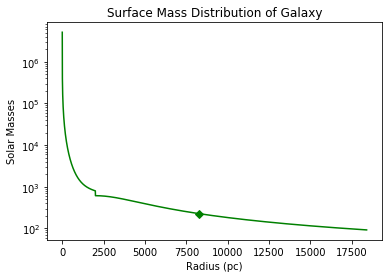

In [583]:
''' Coding in the surface mass density of the Milky Way '''

masslst = d_masslst
for i in range(0, (tb_steps)):
    masslst[i] += b_masslst[i] # Should it be add or equals?


''' Plotting the Mass distribution of the Milky Way '''

plt.plot(d_radiuslst, masslst, '-gD', markevery=solar_system_location)
plt.title('Surface Mass Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Solar Masses')
plt.yscale('log')
plt.show()

# This roughly fits the graph we have from our research for the Surface Mass Distribution (SMD)

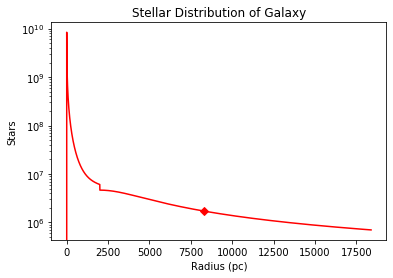

In [588]:
''' Find the distribution of stars throughout the Milky Way '''

# Integrate the SMD curve to see what values we get - are aware that the units may  be off at this point. 
# Find how it compares to the amount of stars in the Milky Way (200 billion), and scale accordingly

t_stars = 2*(10**11)

Ib = integrate.quad(bulge_mass_density, 0, ro)
Id = integrate.quad(disc_mass_density, ro, g_r)
Ig = Ib[0] + Id[0]
stellar_scale = int(t_stars//Ig)

starlst = np.zeros(td_steps)
for i in range(1, (td_steps)):
    starlst[i] = stellar_scale * masslst[i]

plt.plot(d_radiuslst, starlst, '-rD', markevery=solar_system_location)
plt.title('Stellar Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Stars')
plt.yscale('log')
plt.show()

# This is quite bigger than one might initially expect - how can there be ~7500 stars for each solar mass. The  
# average mass of a star is said to be similar to the sun, so you'd initially expect the stellar distribution to 
# be close to 1:1 with the mass distribution. The reason why it isn't is because the equations we used to find 
# the mass distribution took 1D slices of the galaxy, and didn't account for the entire 3D galaxy (only took a 
# small angular section and not the whole 2π range). Even with this, it might be too big, possible that the 
# integration wasn't the right method for this

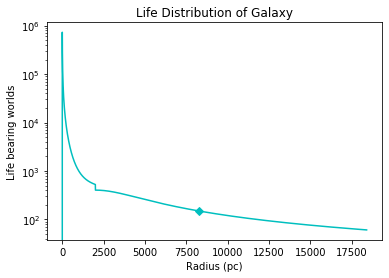

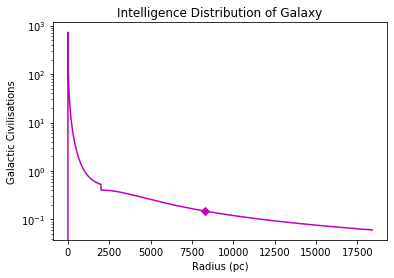

In [590]:
''' Add in constants of the Drake Equation '''

# The fraction of those stars that have Earth-like planets
stars_with_planets = 1/6

# The fraction of stars that are G-type and in the main sequence
g_type_stars = 63/800
g_type_earth = 0.26            # sun-like stars have Earth-sized planets, variance ± 3%

# The average number of planets that can potentially support life per star that has planets
goldilocks_earths = 0.4231     # for sun-like stars, massive variance of 0.2414 to 0.6521

# The fraction of planets that could support life that actually develop life at some point
planets_with_life = 0.01

# The fraction of planets with life that actually go on to develop intelligent life
planets_with_intelligent_life = 0.001

# Scaling factors from the factors used
scaling_goldilocks = g_type_stars * g_type_earth * goldilocks_earths
scaling_life = scaling_goldilocks * planets_with_life
scaling_intelligence = scaling_life * planets_with_intelligent_life


''' Plot of where life and intelligent life is based on the Drake Equation (no supernovae or metallicity) '''

lifelst = np.zeros(td_steps)
for i in range(0, (td_steps)):
    lifelst[i] = scaling_life * starlst[i]

intelligencelst = np.zeros(td_steps)
for i in range(0, (td_steps)):
    intelligencelst[i] = scaling_intelligence * starlst[i]


plt.plot(d_radiuslst, lifelst, '-cD', markevery=solar_system_location)
plt.title('Life Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Life bearing worlds')
plt.yscale('log')
plt.show()

plt.plot(d_radiuslst, intelligencelst, '-mD', markevery=solar_system_location)
plt.title('Intelligence Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Galactic Civilisations')
plt.yscale('log')
plt.show()

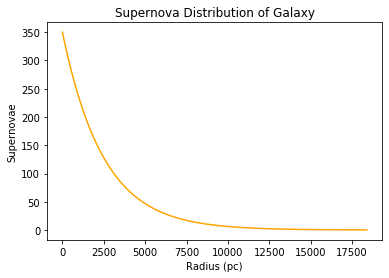

In [597]:
''' Coding in the distribution of supernovae '''

# Constants for the Supernovae

s_density = 350
normalisation = 2/g_r     # The source where we took this equation from normalised it so 0 ≤ r ≤ 2
R_scale = 0.27

def supernova_distribution(r):
    return(s_density * mt.exp(-(r*normalisation)/R_scale))

supernovaelst = np.zeros(td_steps)
for i in range(0, (td_steps)):
    supernovaelst[i] = supernova_distribution(i)


plt.plot(d_radiuslst, supernovaelst, 'orange')
plt.title('Supernova Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Supernovae')
plt.show()

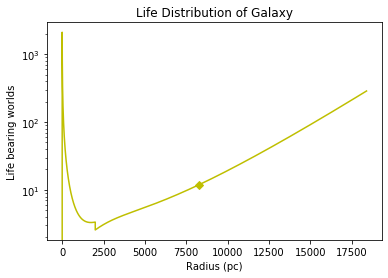

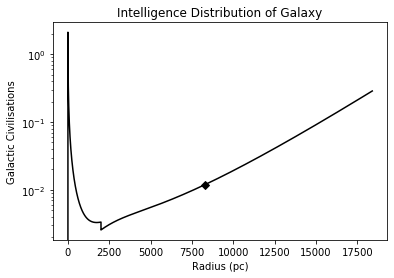

In [592]:
''' Plotting life with supernova added as a linear constant - the more supernovae the less life '''

def life(factorlst, newlifelst, lifelst, exp=1, steps=td_steps, scale=1):
    ''' Creates function to fill out a new life/intelligence list taking a given factor'''
    for i in range(0, steps):
        try:
            newlifelst[i] = scale * ( (factorlst[i])**exp ) * lifelst[i]
        except ZeroDivisionError:
            newlifelist[i] = 0

s_lifelst = np.zeros(td_steps)
life(supernovaelst, s_lifelst, lifelst, -1)

s_intelligencelst = np.zeros(td_steps)
life(supernovaelst, s_intelligencelst, intelligencelst, -1)


plt.plot(d_radiuslst, s_lifelst, '-yD', markevery=solar_system_location)
plt.title('Life Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Life bearing worlds')
plt.yscale('log')
plt.show()

plt.plot(d_radiuslst, s_intelligencelst, '-kD', markevery=solar_system_location)
plt.title('Intelligence Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Galactic Civilisations')
plt.yscale('log')
plt.show()

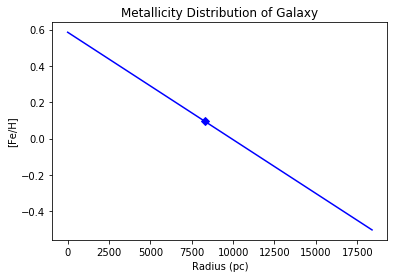

In [593]:
''' Coding in the distribution of metallicity '''

# Constants for the Metallicity - variable 1 and 2 gotten from a study, not sure what they represent

v1 = -0.068
normalisation = 16/g_r     # The source where we took this equation from normalised it so 0 ≤ r ≤ 16
v2 = 0.585
start = 0

def metallicity_distribution(r):
    return((v1*r*normalisation)+v2)

metallicitylst = np.zeros(td_steps-start)
for i in range(0, (td_steps-start)):
    metallicitylst[i] = metallicity_distribution(i+start)

plt.plot(d_radiuslst[start:], metallicitylst, '-bD', markevery=solar_system_location)
plt.title('Metallicity Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('[Fe/H]')
plt.show()

# We are expanding the metallicity of the disc into the bulge

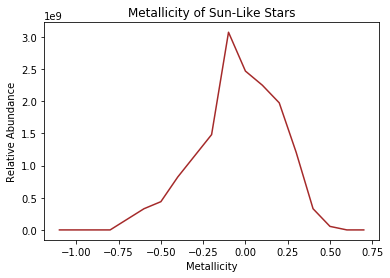

In [599]:
''' Metallicity of Sun-Like Stars '''

# Get constants for the code
big_metal = 0.7
small_metal = -1.2
m_step = 0.1
sample_stars = 287
metal_num = int((big_metal - small_metal)/m_step) + 1
suns_in_galaxy = 1.575e10

# Get a list of the metallicity values in the galaxy 
metal_list = np.zeros(metal_num)
for i in range(0, metal_num):
    metal_list[i] = big_metal - (i*m_step)

# Get a list of how many sun like stars were found with each metallicity and divide by the sample size
relative_list = [0, 0, 1, 6, 22, 36, 41, 45, 56, 27, 21, 15, 8, 6, 3, 0, 0, 0, 0]
for i in range(0, len(relative_list)-1):
    relative_list[i] = (relative_list[i]/sample_stars) * suns_in_galaxy

# Plot the relative abundance of sun-like stars for each metallicity
plt.plot(metal_list, relative_list, 'brown')
plt.title('Metallicity of Sun-Like Stars')
plt.xlabel('Metallicity')
plt.ylabel('Relative Abundance')
plt.show()

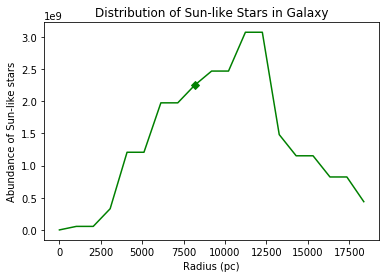

In [605]:
''' Distribution of Sun-like Stars throughout the Milky Way '''

# Set a new scale where we take the values with ~20,000 different points and turn it into 19 points
nu_scale = int(len(d_radiuslst)/(len(metal_list)-1)) -1

n_radiuslst = np.zeros(metal_num)
for i in range(0, metal_num):    # might wanna do range(1, metal_num)
    n_radiuslst[i] = d_radiuslst[i*nu_scale]

n_solar_system_location = [8]     # Have to change it to fit the new scale

# Get a list of the distribution of suns in the galaxy
sunslst = np.zeros(metal_num)
for i in range(0, metal_num):
    metal = round(metallicitylst[i*nu_scale], 1)
    
    for j in range(0, metal_num):
        if (round(metal_list[j], 1) == metal):
            sunslst[i] = relative_list[j]


''' Plot '''
plt.plot(n_radiuslst, sunslst, '-gD', markevery=n_solar_system_location)
plt.title('Distribution of Sun-like Stars in Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Abundance of Sun-like stars')
plt.show()

# We've rationalised that this is the way the distribution of life in the galaxy should look, but scaled 
# and with the supernova rate added in

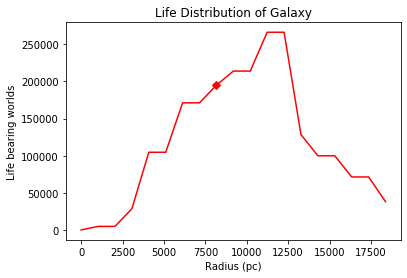

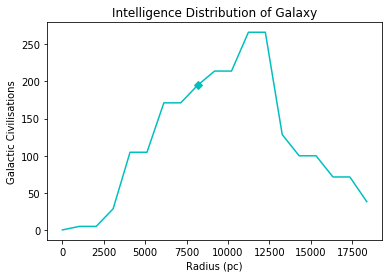

In [606]:
''' Scaled with Drake Equation Constants '''
# Maybe find a new radius list?

# Use the scaling factors already created but on sunslst
lifelst_p2 = np.zeros(metal_num)
for i in range(0, (metal_num)):
    lifelst_p2[i] = scaling_life * sunslst[i]

intelligencelst_p2 = np.zeros(metal_num)
for i in range(0, (metal_num)):
    intelligencelst_p2[i] = scaling_intelligence * sunslst[i]


plt.plot(n_radiuslst, lifelst_p2, '-rD', markevery=n_solar_system_location)
plt.title('Life Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Life bearing worlds')
plt.show()

plt.plot(n_radiuslst, intelligencelst_p2, '-cD', markevery=n_solar_system_location)
plt.title('Intelligence Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Galactic Civilisations')
plt.show()

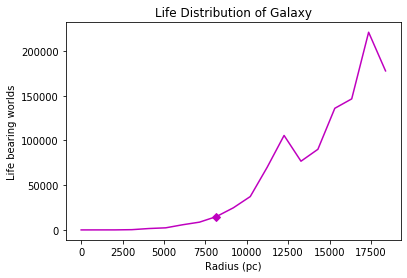

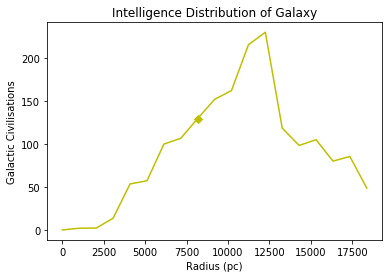

In [624]:
''' Add in the supernovae ''' # WEIRD SCALING THING

new_scale = 1/(2*mt.pi)

n_supernovaelst = np.zeros(metal_num)
for i in range(0, metal_num):    # might wanna do range(1, metal_num)
    n_supernovaelst[i] = supernovaelst[i*nu_scale]

s_lifelst_p2 = np.zeros(metal_num)
life(n_supernovaelst, s_lifelst_p2, lifelst_p2, -1, metal_num)

s_intelligencelst_p2 = np.zeros(metal_num)
life(n_supernovaelst, s_intelligencelst_p2, intelligencelst_p2, -new_scale, metal_num)


plt.plot(n_radiuslst, s_lifelst_p2, '-mD', markevery=n_solar_system_location)
plt.title('Life Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Life bearing worlds')
plt.show()

plt.plot(n_radiuslst, s_intelligencelst_p2, '-yD', markevery=n_solar_system_location)
plt.title('Intelligence Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Galactic Civilisations')
plt.show()

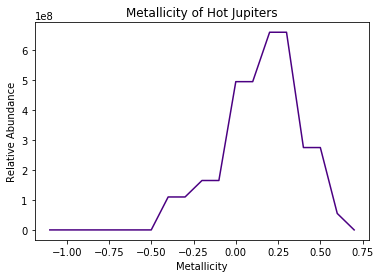

In [614]:
''' Hot Jupiters '''

# Get a list of how many jupiters were found with each metallicity and divide by the sample size
jupiter_list = [0, 1, 5, 5, 12, 12, 9, 9, 3, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0]
for i in range(0, metal_num):
    jupiter_list[i] = round((jupiter_list[i]/sample_stars), 6) * suns_in_galaxy

# Plot the relative abundance of hot jupiters for each metallicity
plt.plot(metal_list, jupiter_list, 'indigo')
plt.title('Metallicity of Hot Jupiters')
plt.xlabel('Metallicity')
plt.ylabel('Relative Abundance')
plt.show()

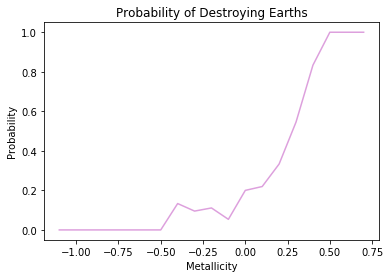

In [616]:
''' Probablity '''
destroy = np.zeros(metal_num)
check = 0
for i in range(0, metal_num):
    try:
        value = jupiter_list[i]/relative_list[i]
        if (value < 1):
            destroy[i] = value
        else:
            destroy[i] = 1
    except ZeroDivisionError:
        destroy[i] = 0

destroy[:2]= 1


# Plot the chance of Hot Jupiters destroying Earth for each metallicity
plt.plot(metal_list, destroy, 'plum')
plt.title('Probability of Destroying Earths')
plt.xlabel('Metallicity')
plt.ylabel('Probability')
plt.show()

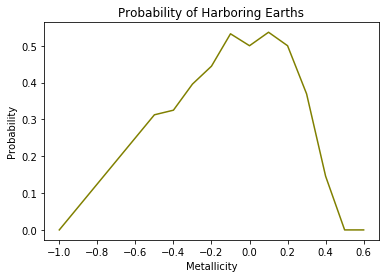

In [619]:
''' Probability of Harbouring Earths '''
low_m = -1
high_m = 0.6
n_destroy = destroy[17:0:-1]
n_metal_list = metal_list[17:0:-1]

def ppe(metallicity):
    if (metallicity <= low_m):
        return 0
    elif (metallicity <= high_m):
        return ((metallicity - low_m)/(high_m - low_m))
    else:
        return 1

ppe_list = np.zeros(metal_num-2)
for i in range(0, (metal_num-2)):
    metallicity = (i * 0.1) - 1
    ppe_list[i] = ppe(metallicity)

phe_list = np.zeros(metal_num-2)
for i in range(0, (metal_num-2)):
    phe_list[i] = ppe_list[i]*(1-n_destroy[i])


# Plot the phe
plt.plot(n_metal_list, phe_list, 'olive')
plt.title('Probability of Harboring Earths')
plt.xlabel('Metallicity')
plt.ylabel('Probability')
plt.show()

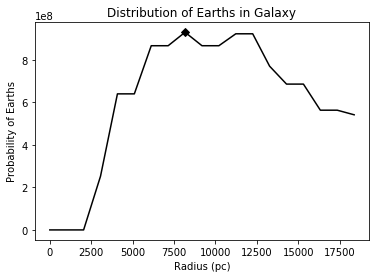

In [620]:
''' Distribution of Earths throughout the Milky Way '''

earths_in_galaxy = suns_in_galaxy * 0.11

earthlst = np.zeros(metal_num)
for i in range(0, metal_num):
    metal = round(metallicitylst[i*nu_scale], 1)
    
    for j in range(0, metal_num-2):
        if (round(n_metal_list[j], 1) == metal):
            earthlst[i] = phe_list[j] * earths_in_galaxy

#print(metal_list)

''' Plot '''
plt.plot(n_radiuslst, earthlst, '-kD', markevery=n_solar_system_location)
plt.title('Distribution of Earths in Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Probability of Earths')
plt.show()

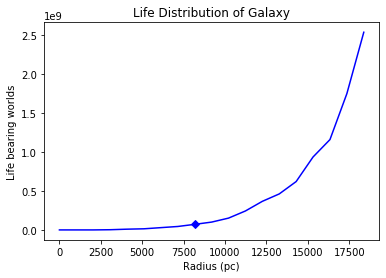

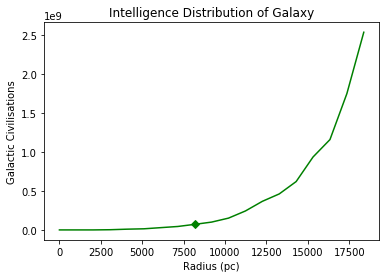

In [621]:
''' Add in the supernovae '''

ns_lifelst = np.zeros(metal_num)
life(n_supernovaelst, ns_lifelst, earthlst, -1, metal_num)

ns_intelligencelst = np.zeros(metal_num)
life(n_supernovaelst, ns_intelligencelst, earthlst, -1, metal_num)


plt.plot(n_radiuslst, ns_lifelst, '-bD', markevery=n_solar_system_location)
plt.title('Life Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Life bearing worlds')
plt.show()

plt.plot(n_radiuslst, ns_intelligencelst, '-gD', markevery=n_solar_system_location)
plt.title('Intelligence Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Galactic Civilisations')
plt.show()

C:\Users\mahee\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
C:\Users\mahee\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


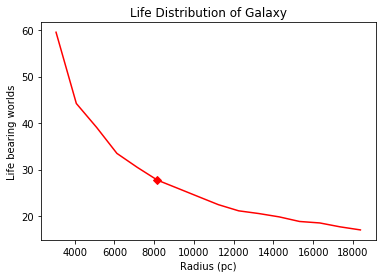

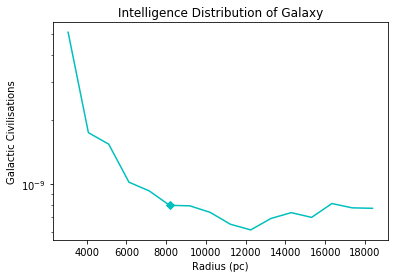

In [622]:
''' Plotting life with earthlist added in '''

# OG MAP WITH THE METALLICITY ADDED IN

nm_lifelst = np.zeros(metal_num)
life(earthlst, nm_lifelst, s_lifelst, -new_scale, metal_num)

nm_intelligencelst = np.zeros(metal_num)
life(earthlst, nm_intelligencelst, s_intelligencelst, -1, metal_num)


plt.plot(n_radiuslst[start:], nm_lifelst, '-rD', markevery=n_solar_system_location)
plt.title('Life Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Life bearing worlds')
#plt.yscale('log')
plt.show()

plt.plot(n_radiuslst[start:], nm_intelligencelst, '-cD', markevery=n_solar_system_location)
plt.title('Intelligence Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Galactic Civilisations')
plt.yscale('log')
plt.show()

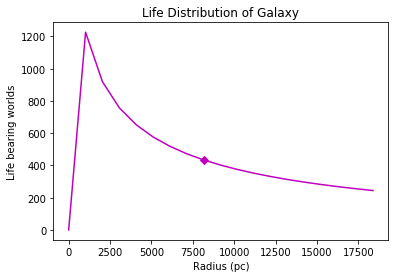

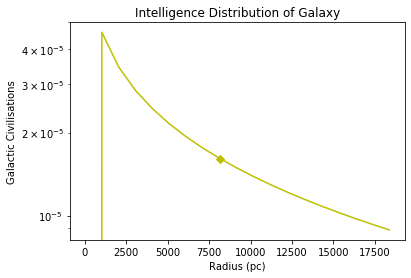

In [623]:
''' Plotting life with supernova added as a linear constant - the more supernovae the less life '''

m_lifelst = np.zeros(metal_num)
life(metallicitylst, m_lifelst, s_lifelst, 1, metal_num)

m_intelligencelst = np.zeros(metal_num)
life(metallicitylst, m_intelligencelst, s_intelligencelst, 20, metal_num)


plt.plot(n_radiuslst, m_lifelst, '-mD', markevery=n_solar_system_location)
plt.title('Life Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Life bearing worlds')
#plt.yscale('log')
plt.show()

plt.plot(n_radiuslst, m_intelligencelst, '-yD', markevery=n_solar_system_location)
plt.title('Intelligence Distribution of Galaxy')
plt.xlabel('Radius (pc)')
plt.ylabel('Galactic Civilisations')
plt.yscale('log')
plt.show()